# 01 - Introduction to Time Series Analysis

Based on [Alejandro Correa Bahnsen](albahnsen.com/)'s class notes for this course.

version 2.0, July 2021

## Part of the class [Advanced Methods in Data Analysis](https://github.com/davidzarruk/AdvancedMethodsDataAnalysisClass)



This notebook is licensed under a [Creative Commons Attribution-ShareAlike 3.0 Unported License](http://creativecommons.org/licenses/by-sa/3.0/deed.en_US). Special thanks goes to [TAVISH SRIVASTAVA]()

## Textbook: 

The best reference for time series analysis is Time Series Analysis by James Hamilton.

# Introduction

‘Time’ is one of the most important factors which, when exploited correctly, allow a business to be successful. In particular, technology has developed some powerful methods which we can use to ‘see things’ ahead of time: prediction and forecasting. One such methods, which deals with time based data, is Time Series Modeling. As the name suggests, it involves working on time (years, days, hours, minutes) based data, to derive hidden insights to make informed decisions.

Most businesses work on time series data to predict sales, website traffic, competition positions, and much more. However, there is a large amount of theory behind the econometrics of time series analysis, which makes it a difficult tool to apply on every business, due to the lack of skills.

This guide would introduce you to various levels of time series modeling and its related techniques.

# Part 1. Time Series Modeling

Let’s begin from basics.  This includes stationary series, random walks , Rho Coefficient, Dickey Fuller Test of Stationarity. 

## Stationary Series

A TS is said to be stationary if its statistical properties such as mean, variance and autocovariance remain constant over time. But why is it important? Most of the TS models work on the assumption that the TS is stationary. Intuitively, we can sat that if a TS has a behaviour that, on average, does not change over time, we can construct models to predict its future behavior. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.

Stationarity is defined using very strict criterion. However, for practical purposes we can assume the series to be stationary if it has constant statistical properties over time, ie. the following:

1. The mean of the series should be constan and not a function of time. The image below illustrates the behavior of two time series: one that has a constant mean over time, and one that has time-dependent mean.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

<AxesSubplot:>

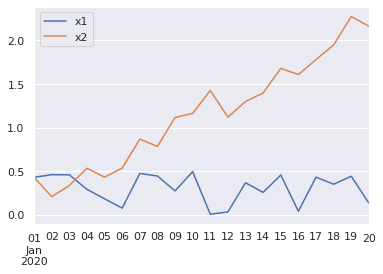

In [2]:
ts = pd.DataFrame(np.random.rand(20, 2)/2, 
                  index=pd.date_range("2020-01-01", periods=20),
                  columns=['x1', 'x2'])
ts['x2'] = [x+i/10 for i, x in enumerate(ts['x2'])]
ts.plot()

2. The variance of the series should not a be a function of time. This property is known as homoscedasticity. The following graph depicts what is and what is not a stationary series. 

<AxesSubplot:>

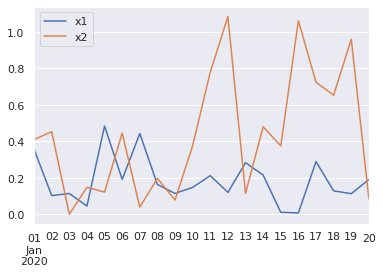

In [3]:
ts = pd.DataFrame(np.random.rand(20, 2)/2, 
                  index=pd.date_range("2020-01-01", periods=20),
                  columns=['x1', 'x2'])
ts['x2'] = [x if i<10 else x*3 for i, x in enumerate(ts['x2'])]
ts.plot()

3. The covariance of the i th term and the (i + m) th term should not be a function of time. 

## Why do we care about stationarity of a time series?

The reason I took up this section first was that until unless your time series is stationary, you cannot build a time series model. In cases where the stationary criterion are violated, the first requisite becomes to stationarize the time series and then try stochastic models to predict this time series. There are multiple ways of bringing this stationarity. Some of them are Detrending, Differencing etc.

## Random Walk
This is the most basic concept of the time series. You might know the concept well. But, I found many people in the industry who interprets random walk as a stationary process. 

Example: Imagine a girl moving randomly on a giant chess board. In this case, next position of the girl is only dependent on the last position.



<img src="https://www.analyticsvidhya.com/wp-content/uploads/2015/02/RandomWalk.gif">

Now imagine, you are sitting in another room and are not able to see the girl. You want to predict the position of the girl with time. How accurate will you be? Of course you will become more and more inaccurate as the position of the girl changes. At t=0 you exactly know where the girl is. Next time, she can only move to 8 squares and hence your probability dips to 1/8 instead of 1 and it keeps on going down. Now let’s try to formulate this series :



`X(t) = X(t-1) + Er(t)`

where Er(t) is the error at time point t. This is the randomness the girl brings at every point in time.

Now, if we recursively fit in all the Xs, we will finally end up to the following equation :

`X(t) = X(0) + Sum(Er(1),Er(2),Er(3).....Er(t))`

Now, lets try validating our assumptions of stationary series on this random walk formulation:


1. Is the Mean constant ?

`E[X(t)] = E[X(0)] + Sum(E[Er(1)],E[Er(2)],E[Er(3)].....E[Er(t)])`

We know that Expectation of any Error will be zero as it is random.

Hence we get 

`E[X(t)] = E[X(0)] = Constant`.

 

2. Is the Variance constant?

`Var[X(t)] = Var[X(0)] + Sum(Var[Er(1)],Var[Er(2)],Var[Er(3)].....Var[Er(t)])`

`Var[X(t)] = t * Var(Error) = Time dependent.`

Hence, we infer that the random walk is not a stationary process as it has a time-dependent variance. Also, if we check the covariance, we see that too is dependent on time. The following figure illustrates the behavior of one random walk:


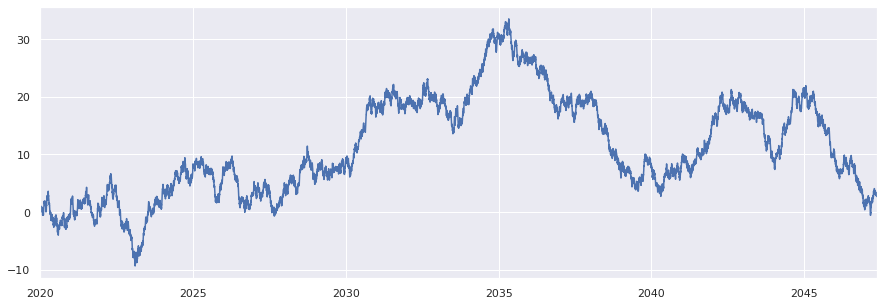

In [4]:
def ts(rho, num, periods=200):
    for j in range(num):
        ts = pd.Series(np.random.rand(periods) - 0.5, index=pd.date_range("2020-01-01", periods=periods))

        for i in range(1, ts.shape[0]):
            ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
        ts.plot(figsize=(15, 5))

ts(1,1,periods=10000)

The following plot shows 200 random walks that start from 0. Clearly, the variance of the random walk process increases with time and the process is not stationary, even though the mean of the process is constant and equal to zero.

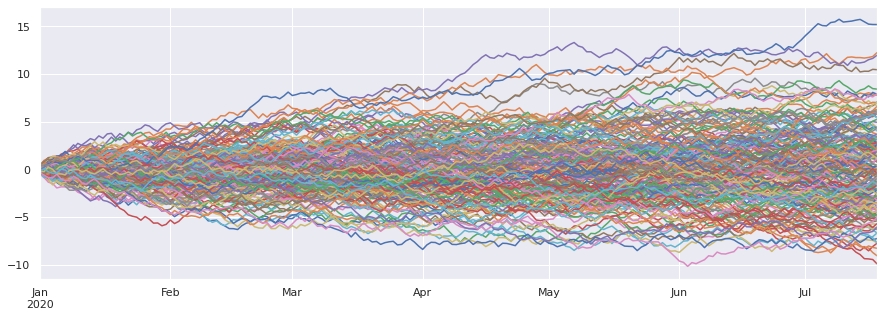

In [5]:
ts(1,200)

# Rho

We already know that a random walk is a non-stationary process. Let us describe a more general time series, where the random walk is a particular case:

`X(t) = Rho * X(t-1) + Er(t)`

This time series is called an autorregressive process of order one. Note that the random walk case is precisely the case where Rho=1.

Let’s start with the case of Rho = 0 . Here is the plot for the time series:

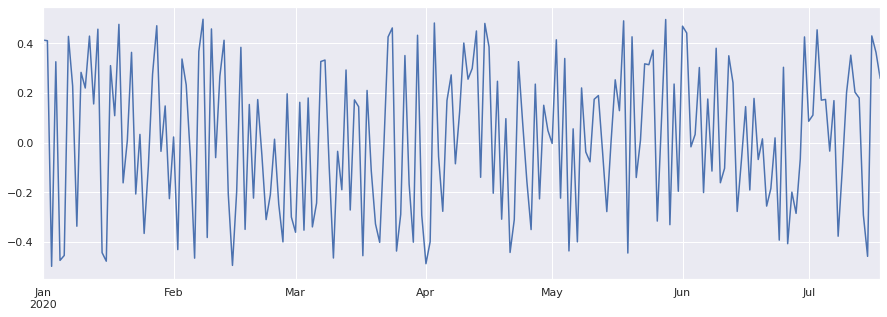

In [6]:
ts(rho=0, num=1)

Increase the value of Rho to 0.5 gives us following graph :

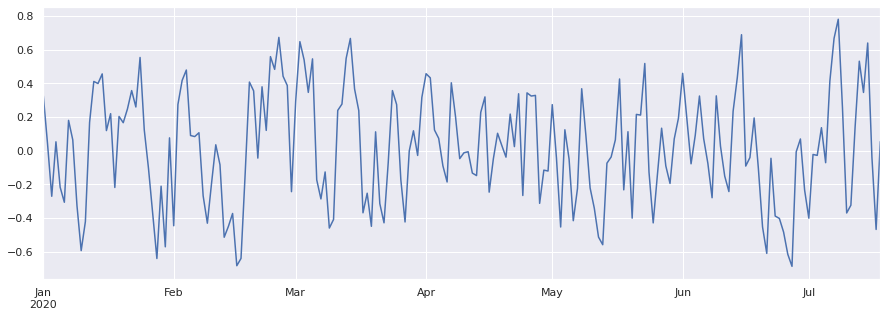

In [7]:
ts(rho=0.5,num=1)

As the value of Rho increases, the "momentum" of the time series increases and its values become more dependent on the immediately previous value:

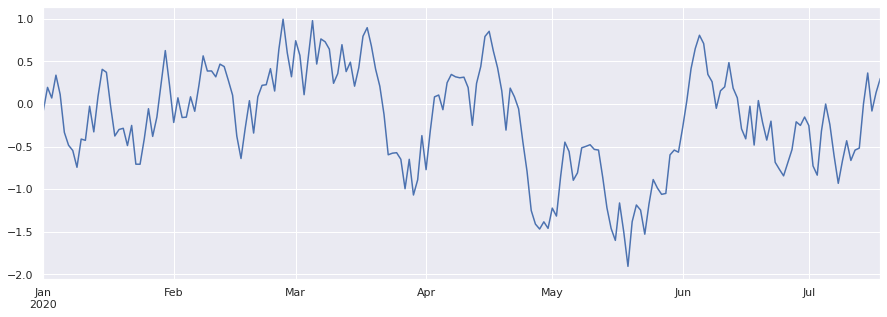

In [8]:
ts(rho=0.95,num=1)

Let’s now take a more extreme case of Rho = 0.99. The following figure illustrates the behavior of 100 of these time series. As we can see, the variance is constant and does not depend on time, as it did in the random walk case.

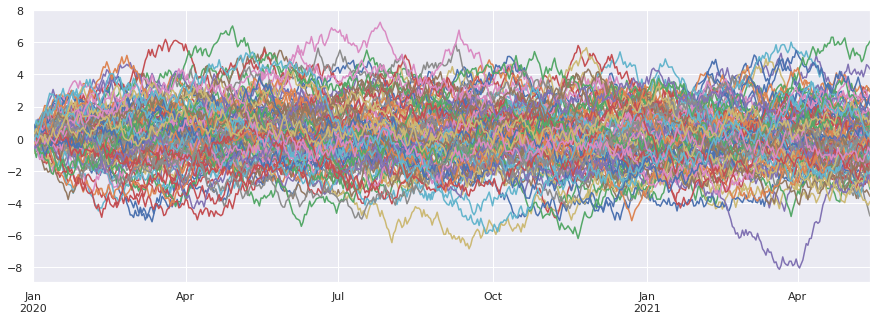

In [9]:
ts(rho=0.99,num=100,periods=500)

If we take a look at 100 time series with Rho=0.99, it is clear that the variance of the process is constant over time, no matter how many periods we move ahead. With Rho=0.99, the process is still stationary.

Now, let’s take a look at the random walk with rho = 1.

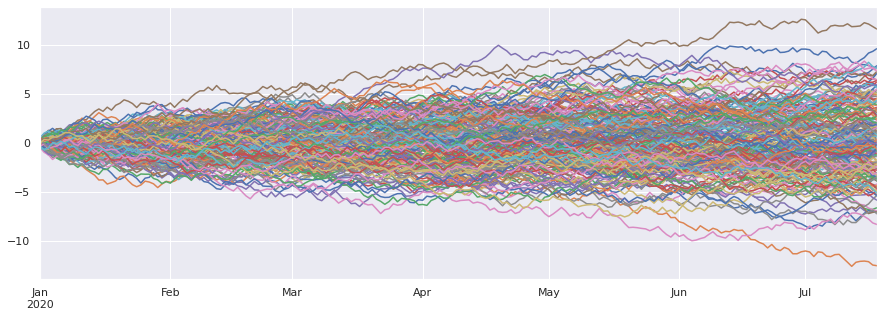

In [10]:
ts(1,200)

This obviously is an violation to stationary conditions.

Let’s take expectation on each side of the equation  “X(t) = Rho * X(t-1) + Er(t)”

`E[X(t)] = Rho *E[ X(t-1)]`

This equation is very insightful. The next X (or at time point t) is being pulled down to Rho * Last value of X. A stationary process (that in which Rho < 1) is called a mean-reverting process because of that. 

For instance, if X(t – 1 ) = 1, E[X(t)] = 0.5 ( for Rho = 0.5) . Now, if X moves to any direction from zero, it is pulled back to zero in next step. The only component which can drive it even further is the error term. Error term is equally probable to go in either direction. What happens when the Rho becomes 1? No force can pull the X down in the next step.

## Dickey Fuller Test of Stationarity

What you just learnt in the last section is formally known as Dickey Fuller test. Here is a small tweak which is made for our equation to convert it to a Dickey Fuller test:

`X(t) = Rho * X(t-1) + Er(t)`

`=>  X(t) - X(t-1) = (Rho - 1) X(t - 1) + Er(t)`

We have to test if Rho – 1 is significantly different from zero or not. If the null hypothesis gets rejected, we’ll get a stationary time series.

Stationary testing and converting a series into a stationary series are the most critical processes in a time series modelling.

In [11]:
from statsmodels.tsa.stattools import adfuller

In [12]:
def ts(rho, periods=200):
    ts = pd.Series(np.random.rand(periods) - 0.5, index=pd.date_range("2020-01-01", periods=periods))
    
    for i in range(1, ts.shape[0]):
        ts.iloc[i] = ts.iloc[i] + rho * ts.iloc[i-1]    
    return ts

In the following example, Rho=0, so clearly the Dickey-Fuller test gets rejected, which means that Rho-1 is different from 0:

ADF Statistic: -13.854209
p-value: 0.000000
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


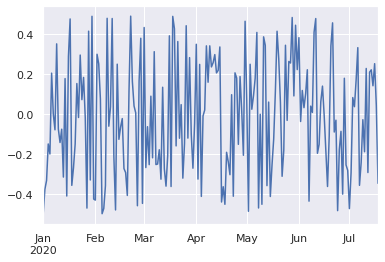

In [13]:
ts1 = ts(rho=0)
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

With Rho=0.95 the test still gets rejected. However, notice that the p-value is not as small as with Rho=0. The reason is because, as Rho gets closer to 1, it is more difficult to identify if Rho is statistically different from 0. Actually, for larger values of Rho, such as Rho=0.99, we would need longer time series for the Dickey-Fuller test to reject the null hypothesis:

ADF Statistic: -2.646109
p-value: 0.083837
Critical Values:
	1%: -3.464
	5%: -2.876
	10%: -2.575


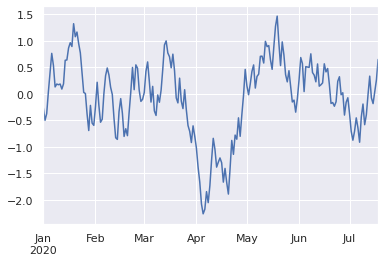

In [14]:
ts1 = ts(rho=0.95)
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

Finally, for Rho=1, the Dickey-Fuller test cannot reject the null hypothesis:

ADF Statistic: -1.940481
p-value: 0.313263
Critical Values:
	1%: -3.465
	5%: -2.877
	10%: -2.575


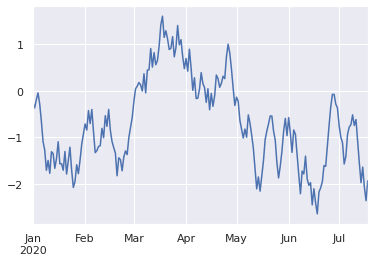

In [15]:
ts1 = ts(rho=1)
ts1.plot()
result = adfuller(ts1)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Part 2 - Exploration of Time Series Data in Python

Analyzing google trends of new years resolutions

Import data that you downloaded with .read_csv() and check out first several rows with .head().

In [16]:
df = pd.read_csv('../datasets/newyearresolution.csv.gz', skiprows=1)
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,77,27,49
2,2004-03,71,25,47
3,2004-04,71,23,48
4,2004-05,73,23,44


You can also use the .info() method to check out your data types, number of rows and more:

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 198 non-null    object
 1   diet: (Worldwide)     198 non-null    int64 
 2   gym: (Worldwide)      198 non-null    int64 
 3   finance: (Worldwide)  198 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.3+ KB


###  Wrangle Your Data
The first thing that you want to do is rename the columns of your DataFrame df so that they have no whitespaces in them. There are multiple ways to do this, but for now, you'll reassign to df.columns a list of what you want the columns to be called.

In [18]:
df.columns = ['month', 'diet', 'gym', 'finance']
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,77,27,49
2,2004-03,71,25,47
3,2004-04,71,23,48
4,2004-05,73,23,44


Next, you'll turn the 'month' column into a DateTime data type and make it the index of the DataFrame.

Note that you do this because you saw in the result of the .info() method that the 'Month' column was actually of data type object. Now, that generic data type encapsulates everything from strings to integers, etc. That's not exactly what you want when you want to be looking at time series data. That's why you'll use .to_datetime() to convert the 'month' column in your DataFrame to a DateTime.

Be careful! Make sure to include the inplace argument when you're setting the index of the DataFrame df so that you actually alter the original index and set it to the 'month' column.

In [19]:
df.month = pd.to_datetime(df.month)
df.set_index('month', inplace=True)

df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,77,27,49
2004-03-01,71,25,47
2004-04-01,71,23,48
2004-05-01,73,23,44


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 198 entries, 2004-01-01 to 2020-06-01
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   diet     198 non-null    int64
 1   gym      198 non-null    int64
 2   finance  198 non-null    int64
dtypes: int64(3)
memory usage: 6.2 KB


### Exploratory Data Analysis

You can use a built-in pandas visualization method .plot() to plot your data as 3 line plots on a single figure (one for each column, namely, 'diet', 'gym', and 'finance').

Note that you can also specify some arguments to this method, such as figsize, linewidth and fontsize to set the figure size, line width and font size of the plot, respectively.

Additionally, you'll see that what you see on the x-axis is not the months, as the default label suggests, but the years. To make your plot a bit more accurate, you'll specify the label on the x-axis to 'Year' and also set the font size to 20.

Text(0.5, 0, 'Year')

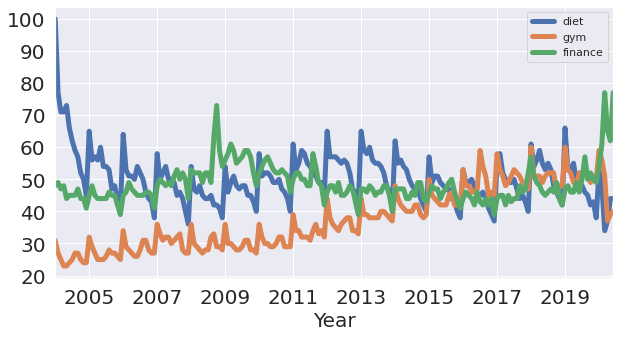

In [21]:
df.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

Tip: if you want to suppress the Matplotlib output, just add a semicolon ; to your last line of code!

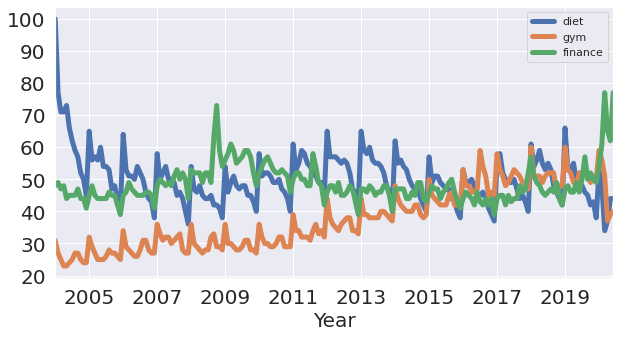

In [22]:
df.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

If you want, you can also plot the 'diet' column by itself as a time series:

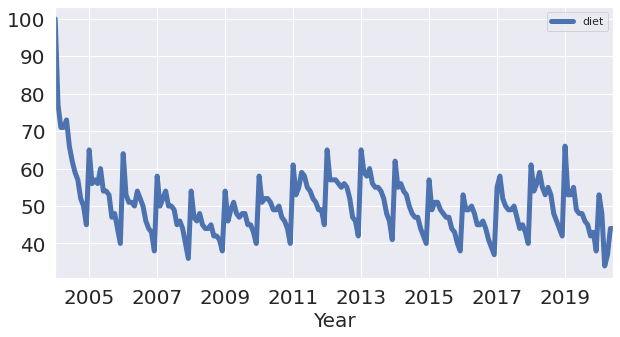

In [23]:
df[['diet']].plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

# Part 3: Trends and Seasonality in Time Series Data


#### Identifying Trends in Time Series
There are several ways to think about identifying trends in time series. One popular way is by taking a rolling average, which means that, for each time point, you take the average of the points on either side of it. Note that the number of points is specified by a window size, which you need to choose.

What happens then because you take the average is it tends to smooth out noise and seasonality. You'll see an example of that right now. Check out this rolling average of 'diet' using the built-in pandas methods.

When it comes to determining the window size, here, it makes sense to first try out one of twelve months, as you're talking about yearly seasonality.

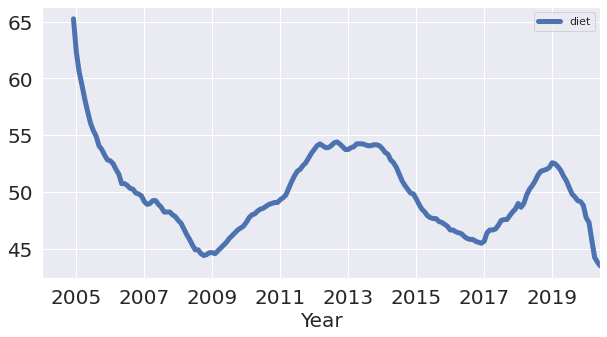

In [24]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Note that in the code chunk above you used two sets of squared brackets to extract the 'diet' column as a DataFrame; If you would have used one set, like df['diet'], you would have created a pandas Series.

In the code chunk above, you also chained methods: you called methods on an object one after another. Method chaining is pretty popular and pandas is one of the packages that really allows you to use that style of programming to the max!

Now you have the trend that you're looking for! You have removed most of the seasonality compared to the previous plot.

You can also plot the rolling average of 'gym' using built-in pandas methods with the same window size as you took for the 'diet' data:

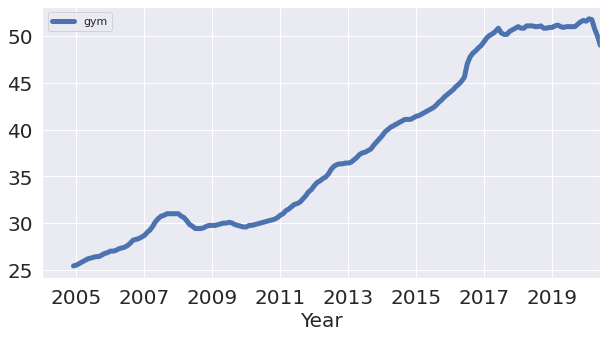

In [25]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You have successfully removed the seasonality and you see an upward trend for "gym"! But how do these two search terms compare?

You can figure this out by plotting the trends of 'gym' and 'diet' on a single figure:

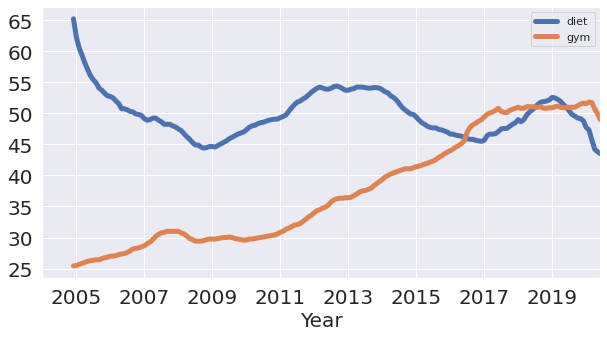

In [26]:
df[['diet', 'gym']].rolling(12).mean().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

With the trends in the data identified, it's time to think about seasonality, which is the repetitive nature of your time series. As you saw in the beginning of this tutorial, it looked like there were trends and seasonal components to the time series of the data.

## Seasonal Patterns in Time Series Data

One way to study the seasonal components of the time series of your data is to remove the trend, so that you can more easily investigate seasonality. To remove the trend, you can subtract the trend you computed above (rolling mean) from the original signal. This, however, will be dependent on how many data points you averaged over.

Another way to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

First-order differencing:
You can use pandas and the diff() and plot() methods to compute and plot the first order difference of the 'diet' Series:

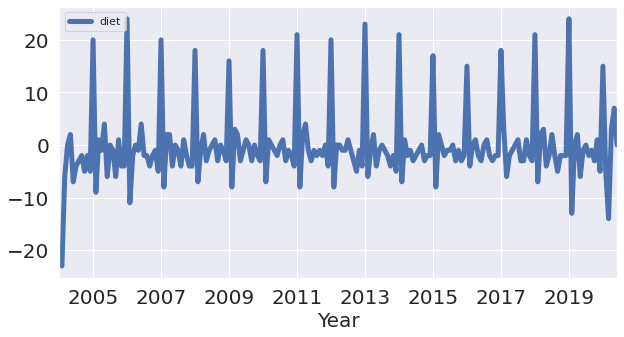

In [27]:
diet.diff().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

See that you have removed much of the trend and you can really see the peaks in January every year. Each January, there is a huge spike of 20 or more percent on the highest search item you've seen!

Differencing is super helpful in turning your time series into a stationary time series which, as we saw before, is one whose statistical properties (such as mean and variance) don't change over time. These time series are useful because many time series forecasting methods are based on the assumption that the time series is stationary.

#### Check for Stationarity

In [28]:
result = adfuller(df['diet'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.647478
p-value: 0.458356
Critical Values:
	1%: -3.467
	5%: -2.877
	10%: -2.575


In [29]:
result = adfuller(df['diet'].diff().iloc[1:])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -3.398391
p-value: 0.011014
Critical Values:
	1%: -3.467
	5%: -2.878
	10%: -2.575


With all of this at hand, you'll now analyze your periodicity in your times series by looking at its autocorrelation function. But before that, you'll take a short detour into correlation.

## Correlation of different time series

To start off, plot all your time series again to remind yourself of what they look like:

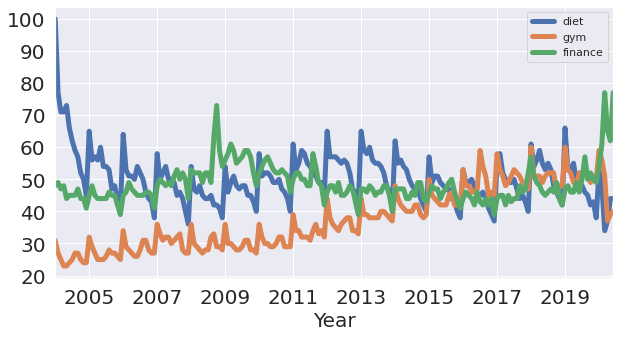

In [30]:
df.plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

Then, compute the correlation coefficients of all of these time series with the help of .corr():



In [31]:
df.corr()

,diet,gym,finance
diet,1.000000,-0.070994,-0.140714
gym,-0.070994,1.000000,-0.087604
finance,-0.140714,-0.087604,1.000000


Now, what does the above tell you?

Let's focus on 'diet' and 'gym'; They are negatively correlated. That's very interesting! Remember that you have a seasonal and a trend component. From the correlation coefficient, 'diet' and 'gym' are negatively correlated. However, from looking at the times series, it looks as though their seasonal components would be positively correlated and their trends negatively correlated.

The actual correlation coefficient is actually capturing both of those.

What you want to do now is plot the first-order differences of these time series and then compute the correlation of those because that will be the correlation of the seasonal components, approximately. Remember that removing the trend may reveal correlation in seasonality.

Start off by plotting the first-order differences with the help of .diff() and .plot():

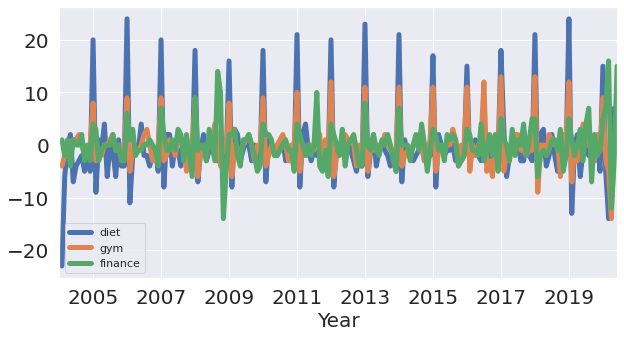

In [32]:
df.diff().plot(figsize=(10,5), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

You see that 'diet' and 'gym' are incredibly correlated once you remove the trend. Now, you'll compute the correlation coefficients of the first-order differences of these time series:

In [33]:
df.diff().corr()

,diet,gym,finance
diet,1.000000,0.779075,0.270743
gym,0.779075,1.000000,0.316195
finance,0.270743,0.316195,1.000000


Note that once again, there was a slight negative correlation when you were thinking about the trend and the seasonal component. Now, you can see that with the seasonal component, 'diet' and 'gym' are highly correlated, with a coefficient of 0.77.

## Periodicity and Autocorrelation

A time series is periodic if it repeats itself at equally spaced intervals, say, every 12 months.

Another way to think of this is that if the time series has a peak somewhere, then it will have a peak 12 months after that and, if it has a trough somewhere, it will also have a trough 12 months after that.

Yet another way of thinking about this is that the time series is correlated with itself shifted by 12 months. That means that, if you took the time series and moved it 12 months backward or forward, it would map onto itself in some way.

Considering the correlation of a time series with such a shifted version of itself is captured by the concept of autocorrelation.

It's time to plot the autocorrelation of the 'diet' series: on the x-axis, you have the lag and on the y-axis, you have how correlated the time series is with itself at that lag.

So, this means that if the original time series repeats itself every two days, you would expect to see a spike in the autocorrelation function at 2 days.

Here, you'll look at the plot and what you should expect to see here is a spike in the autocorrelation function at 12 months: the time series is correlated with itself shifted by twelve months.

Use the plotting interface of pandas, which has the autocorrelation_plot() function. You can use this function to plot the time series 'diet':

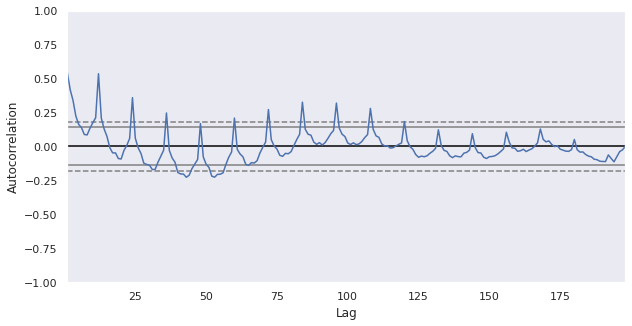

In [34]:
plt.figure(figsize=(10,5))
pd.plotting.autocorrelation_plot(diet);

If you included more lags in your axes, you'd see that it is 12 months at which you have this huge peak in correlation. You have another peak at a 24 month interval, where it's also correlated with itself. You have another peak at 36, but as you move further away, there's less and less of a correlation.

Of course, you have a correlation of itself with itself at a lag of 0.

The dotted lines in the above plot actually tell you about the statistical significance of the correlation. In this case, you can say that the 'diet' series is genuinely autocorrelated with a lag of twelve months.

You have identified the seasonality of this 12 month repetition!